## **Exploratory Data Analysis**

In [ ]:
!gdown --id 1umGsPF8GOmTz5hG4Z8Dnf6R5DCBcI6HJ

In [744]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [745]:
df = pd.read_csv('diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
735,4,95,60,32,0,35.4,0.284,28,0
58,0,146,82,0,0,40.5,1.781,44,0
210,2,81,60,22,0,27.7,0.290,25,0
577,2,118,80,0,0,42.9,0.693,21,1
311,0,106,70,37,148,39.4,0.605,22,0


In [746]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

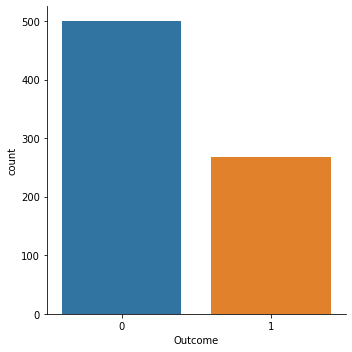

In [747]:
sns.catplot('Outcome', data=df, kind='count')
plt.show()

In [748]:
x_train = df.drop("Outcome",axis=1)
y_train = df["Outcome"]

## **Feature Scalling**

In [749]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train[['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction', 'Age']].values)

In [750]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [751]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (614, 7)
x_test shape: (154, 7)
---------------------------------
y_train shape: (614,)
y_test shape: (154,)


## **Modelling**

In [754]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [755]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [756]:
dec_tree = DecisionTreeClassifier(random_state=5)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=5)

In [757]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [758]:
rfc = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

## **Evaluation**

In [759]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}%")

In [760]:
accuracy(log_reg, 'Logistic Regression')
accuracy(dec_tree, 'Decision Tree')
accuracy(knn, 'K-Nearest Neighbors')
accuracy(rfc, 'Random Forest')

Akurasi model Logistic Regression: 77.27%
Akurasi model Decision Tree: 72.73%
Akurasi model K-Nearest Neighbors: 74.68%
Akurasi model Random Forest: 82.47%


In [761]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result, target_names=['Diabetes', 'Normal']), end="\n\n")

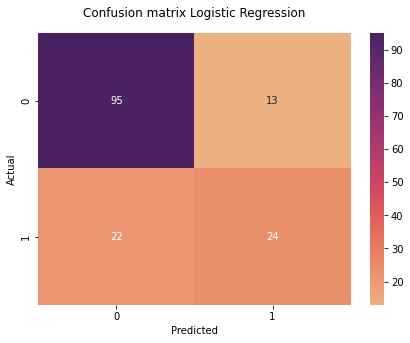


               precision    recall  f1-score   support

    Diabetes       0.81      0.88      0.84       108
      Normal       0.65      0.52      0.58        46

    accuracy                           0.77       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154




In [762]:
report(log_reg, 'Logistic Regression')

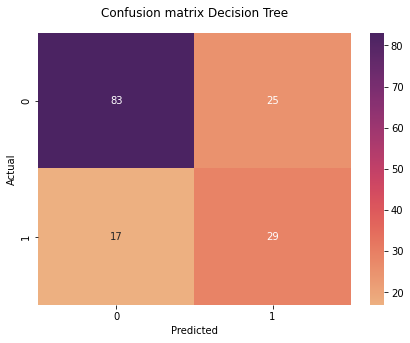


               precision    recall  f1-score   support

    Diabetes       0.83      0.77      0.80       108
      Normal       0.54      0.63      0.58        46

    accuracy                           0.73       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.74      0.73      0.73       154




In [763]:
report(dec_tree, 'Decision Tree')

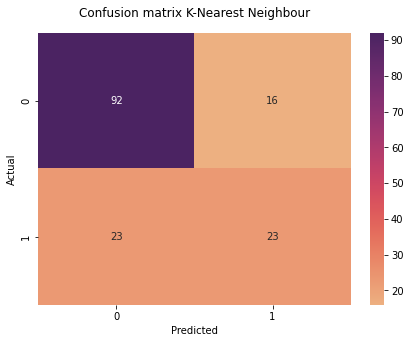


               precision    recall  f1-score   support

    Diabetes       0.80      0.85      0.83       108
      Normal       0.59      0.50      0.54        46

    accuracy                           0.75       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.74      0.75      0.74       154




In [764]:
report(knn, 'K-Nearest Neighbour')

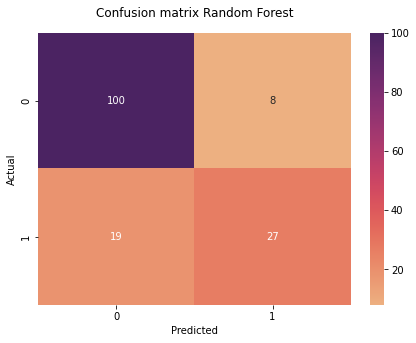


               precision    recall  f1-score   support

    Diabetes       0.84      0.93      0.88       108
      Normal       0.77      0.59      0.67        46

    accuracy                           0.82       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.82      0.82      0.82       154




In [765]:
report(rfc, 'Random Forest')